## MLO Görüntüleri İçin Orta Nokta Bulma

Bu kod sadece CC görüntülerini hedef almıştır.

Bu işlemdeki yaklaşımımız,

* Segmentasyon modelinden çıkan meme ucu maskesinin orta noktasını tespit etme
* Segmentasyondan sonra memenin çıkan en büyük kontörünü aldığımızdaki en uç noktayı bulmak
* Pektoralin en alttaki noktasını bulmak

İki işlem de kadranı belirleme için yapılmıştır. Amaç memenin orta başlangıç noktasından meme ucuna çizilen çizginin bizim için bir kadran ayırıcı görevi görmesidir.

En sağdaki pikselin koordinatları: (1746, 1235)


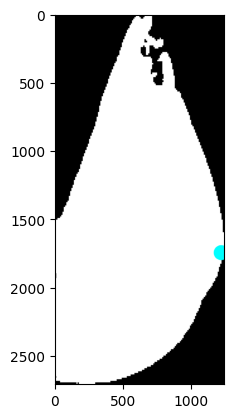

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask = cv2.imread(f"/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/DenemelerMLO/0_combined_maskMLO.png")

white_pixels = np.where(mask == 255)
pixels = list(zip(white_pixels[0], white_pixels[1]))

# En sağdaki pikselin koordinatlarını bul
rightmost_pixel = sorted(pixels, key=lambda x: x[1])[-1]

# Koordinatları yazdır
print("En sağdaki pikselin koordinatları:", rightmost_pixel)

cv2.circle(mask, (rightmost_pixel[1]-20,rightmost_pixel[0]), 5, (0, 255, 255), 100)
plt.imshow(mask)

In [2]:
from skimage import measure
def get_largest_mask(mask):
    labels_mask = measure.label(mask)
    regions = measure.regionprops(labels_mask)
    regions.sort(key=lambda x: x.area, reverse=True)
    if len(regions) > 1:
        for rg in regions[1:]:
            labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
    labels_mask[labels_mask!=0] = 1
    mask = labels_mask
    return mask 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
mask = cv2.imread(f"/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/hasta_no/LMLO_mask.png")
lmask=get_largest_mask(mask[:,:,0])
lmask_img=np.array([lmask,lmask,lmask]).transpose(1,2,0)

print(lmask_img.shape)
white_pixels = np.where(lmask_img == 1)
pixels = list(zip(white_pixels[0], white_pixels[1]))

# En sağdaki pikselin koordinatlarını bul
downmost_pixel = sorted(pixels, key=lambda x: x[0])[-1]

# Koordinatları yazdır
print("En alttaki pikselin koordinatları:", downmost_pixel)

cv2.circle(mask, (downmost_pixel[1],downmost_pixel[0]), 5, (0, 255, 255), 100)
plt.imshow(mask)
print((downmost_pixel[1],downmost_pixel[0]))

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def meme_sonPiksel(meme_mask_path):
    mask = cv2.imread(meme_mask_path)
    white_pixels = np.where(mask == 255)
    pixels = list(zip(white_pixels[0], white_pixels[1]))

    # En sağdaki pikselin koordinatlarını bul
    rightmost_pixel = sorted(pixels, key=lambda x: x[1])[-1]

    # Koordinatları yazdır
    print("En sağdaki pikselin koordinatları:", rightmost_pixel)

    # cv2.circle(mask, (rightmost_pixel[1]-20,rightmost_pixel[0]), 5, (0, 255, 255), 100)
    return (rightmost_pixel[1],rightmost_pixel[0])

from skimage import measure
def get_largest_mask(mask):
    labels_mask = measure.label(mask)
    regions = measure.regionprops(labels_mask)
    regions.sort(key=lambda x: x.area, reverse=True)
    if len(regions) > 1:
        for rg in regions[1:]:
            labels_mask[rg.coords[:,0], rg.coords[:,1]] = 0
    labels_mask[labels_mask!=0] = 1
    mask = labels_mask
    return mask 
def pektoral_sonNokta(pek_mask_path):
    mask = cv2.imread(pek_mask_path)
    lmask=get_largest_mask(mask[:,:,0])
    lmask_img=np.array([lmask,lmask,lmask]).transpose(1,2,0)

    print(lmask_img.shape)
    white_pixels = np.where(lmask_img == 1)
    pixels = list(zip(white_pixels[0], white_pixels[1]))

    # En sağdaki pikselin koordinatlarını bul
    downmost_pixel = sorted(pixels, key=lambda x: x[0])[-1]

    # Koordinatları yazdır
    print("En alttaki pikselin koordinatları:", downmost_pixel)
    return (downmost_pixel[1],downmost_pixel[0])


In [ ]:
meme_mask_path="/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/hasta_no/LMLO_meme_mask.png"
pek_mask_path="/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/hasta_no/LMLO_pektoral_mask.png"
img=cv2.imread("/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/hasta_no/LMLO.png")
meme_mask = cv2.imread(meme_mask_path)
pek_mask = cv2.imread(pek_mask_path)
_rightmost_pixel=meme_sonPiksel(meme_mask_path)
_downmost_pixel=pektoral_sonNokta(pek_mask_path)


meme_mask_cp=meme_mask.copy()

cv2.circle(meme_mask, _rightmost_pixel, 5, (0, 255, 255), 100)
cv2.circle(pek_mask, _downmost_pixel, 5, (0, 255, 255), 100)


cv2.line(meme_mask, _rightmost_pixel, _downmost_pixel, (0, 255, 0), 5)

cv2.line(img, _rightmost_pixel, _downmost_pixel, (0, 255, 0), 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.imshow(pek_mask, cmap='gray')
ax1.set_title('Üst kısım')
ax2.imshow(meme_mask, cmap='gray')
ax2.set_title('Alt kısım')
ax3.imshow(img, cmap='gray')

plt.show()